Exercises 1-2 of Climate Modelling Slides

Exercise 1 is an example
Exercise 2 is an independent work

Exercise 1: Linear Energy Balance Model
C(dT/dt) = S0/4(1-ap)-A-BT
where C(dT/dt) is the time evolution of the planet, S0/4 is the solar incoming short-wave radiation, a is the albedo, and A and B are the outgoing long-wave radiation

C=8.36x10^8 JK^-1m^-2, S0=1360 Wm^-2, αp
=0.30, A=-367.58 Wm^-2, B=2.09 Wm^-2K^-1

1) what is the equilibrium temperature for the given values of the parameters? What is the relaxation
time scale (in years)?
2) write a simple code to integrate numerically the equation. Plot time series of the solution starting
from different initial conditions;
3) repeat 2) for a few different cases changing the equilibrium temperature and/or the relaxation time
scale, by tuning the appropriate parameters.
4) compute and plot the potential of the model for a few different cases

1) what is the equilibrium temperature for the given values of the parameters? 

    a) Define the equilibrium temperature:
        At equilibrium, the change is 0 so dT/dt = 0
        Set everything on the right-hand side to 0, then solve for T to find the equilibrium temperature
        
        0 = S0/4(1-ap)-A-BT
        BT = S0/4(1-ap)-A
        T = (S0/4(1-ap)-A)/B

    b) Use given parameter values to solve for the equilibrium temperature (code below)

In [1]:
#heat capacity
C=8.36*10**8
#incoming short-wave radiation
S_zero=1360
#albedo
Ap=0.30
#outgoing long-wave radiation
A=-367.58
B=2.09

#equilibrium temperature equation
eq_temp = ((S_zero/4)*(1-Ap)-A)/B

1) What is the relaxation time scale (in years)?

    a) Define the deviation from the equilibrium:
    
        delta(T) = T-T0
        T=T0 + delta(T)

    c) Plug the difference into the original Energy Balance Model:
    
        C(d(T0+delta(T))/dt) = S0/4(1-ap)-A-B(T0+delta(T))
        The derivative of a constant is 0, so d(T0) cancels
        C(d(T0+delta(T))/dt) = S0/4(1-ap)-A-B(T0+delta(T))

        According to equilibrium temperature S0/4(1-ap)-A-BT = 0, so that also cancels
        C(d(delta(T))/dt) = -B(delta(T))

        Divide by C to get standard form:
        d(delta(T))/dt = -B(delta(T))/C
   
        Change notation to reflect standards in physics:
        B/C = 1/tau0
        tau0 = C/B

In [2]:
#relaxation timescale equation
tau_zero_seconds = C/B

#convert seconds to years
tau_zero = tau_zero_seconds/86400/365
print(tau_zero)

12.683916793505835


2) write a simple code to integrate numerically the equation. Plot time series of the solution starting
from different initial conditions

    a) Recall the standard form differential equation: dT/dt = -(T-T0/tau0)
       - This equation says that the rate of change in Temperature is proportional to the distance in temperature from the         equilibrium over the relaxation time, tau

    b) Choose discretisation points for analysis (although time is continuous, choose discrete points on the number line to
    form plot of trajectory in time)
       - discretisation points take the form of ti = t0 + i(delta)t
       - can approximate the derivative of the original standard-form equation at time ti by using a forward difference            approximation: dT/dt = (T(ti+1) - T(ti))/(delta)t

   c) Set dT/dt = to the derivative above, and solve the standard form equation:
       - (T(ti+1) - T(ti))/(delta)t = -(T-T0/tau0)
       - Get rid of the delta t:
       - T(ti+1) - T(ti) = -((delta)t/tau0)(Ti-T0)
       - Get updated term by rearranging:
       - T(ti+1) = T(ti) -((delta)t/tau0)(Ti-T0)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

total_time = 100 #years
#create discretisation points
time = np.linspace(0,total_time,total_time+1)
#create empty numpy array initialized with zeroes
T=np.zeros((total_time+1,))
#choose intial temp far enough away from equilibrium to see the change
T[0]=250
#Use the derived equation from the text above to solve the integral and plot, choose timestep of one
for i in range(total_time):
    T[i+1] = T[i]-(T[i]-eq_temp)/tau_zero*1

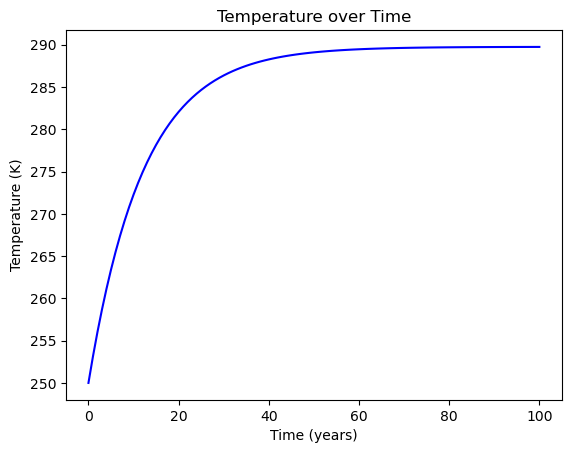

In [4]:
plt.figure()
plt.plot(time,T,'b')
plt.title('Temperature over Time')
plt.xlabel('Time (years)')
plt.ylabel('Temperature (K)')
plt.show()

2) write a simple code to integrate numerically the equation. Plot time series of the solution starting
from different initial conditions

Start with 7 different initial conditions and plot. Code below.

In [5]:
total_initials = 7
T=np.zeros((total_initials,total_time+1))
T[:,0] = [225,250,275,289,300,325,350]

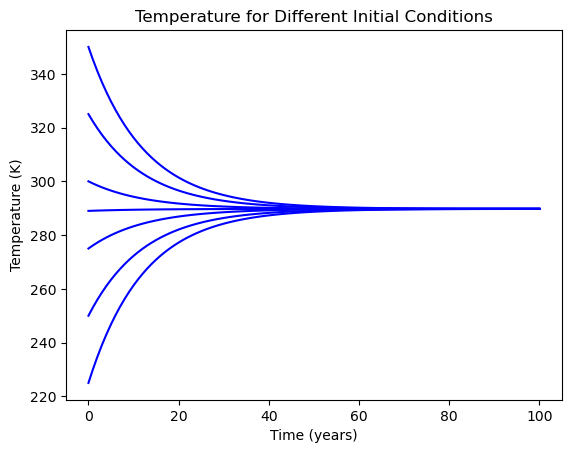

In [6]:
plt.figure()
for k in range(total_initials):
    for i in range(total_time):
        T[k,i+1] = T[k,i]-(T[k,i]-eq_temp)/tau_zero*1
    plt.plot(time,T[k,:],'b')
plt.title('Temperature for Different Initial Conditions')
plt.xlabel('Time (years)')
plt.ylabel('Temperature (K)')
plt.show()

Bonus: Plot the temperature over time with added noise, as in the Ornstein-Uhlenbeck process.

    a) Going from a deterministic system to a stochastic system, we add a deterministic variable, D. This is multiplied by      the noise term to control the amplitude of the noise. The noise term itself will be generated by a 
    random number generated using numbers in a Gaussian distribution.
    
        C(dT/dt) = S0/4(1-ap)-A-BT+D(noise)
        
    b) Dividing D by C gives a new term, epsilon. In the slides, epsilon is given a value, 0.059. So this constant is used 
    in the code below. Because epsilon is in units, Ky^-1/2, multiplying by the square root of delta t is required to 
    cancel the -1/2 on the units.
    
    b) The simulated system is given by
    
        dx/dt = -((x-mu)/tau) + epsilon(noise(t))

        where mu is x0
        
    b) Integration is given by
    
        x(j+1) = xj-((xj-mu)/tau)*delta(t)+epsilon(noise)*sqrt(delta(t))

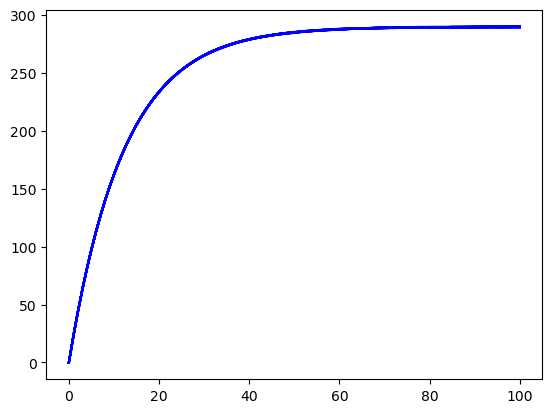

In [7]:
#constant for noise amplitude. 0.059 was in the slides, but I updated it to give larger amplitudes
epsilon = 0.059
total_time = 100 #years
#create discretisation points
time = np.linspace(0,total_time,total_time+1)
#create empty numpy array initialized with zeroes
T=np.zeros((total_time+1,))

def generate_random():
    noise = np.random.randn()
    return noise

for k in range(0,30):
    #Use the derived equation from the text above to solve the integral and plot, choose timestep of one
    for i in range(total_time):
        noise = generate_random()
        #print(epsilon*noise)
        T[i+1] = T[i]-(T[i]-eq_temp)/tau_zero + epsilon*noise

    plt.plot(time,T,'b')

The above epsilon (noise amplitude) is very small. Giving a bigger amplitude allows for a more noisy ensemble. Code below.

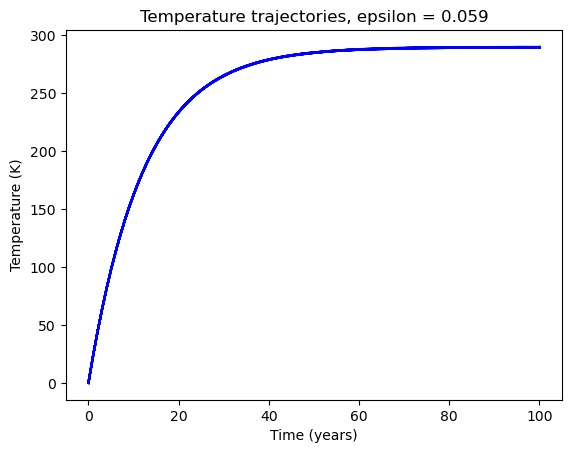

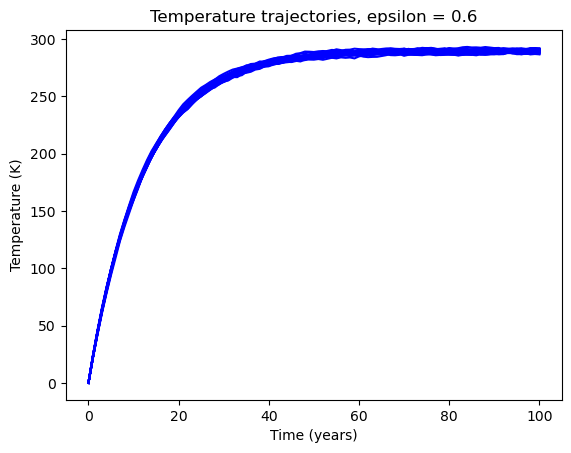

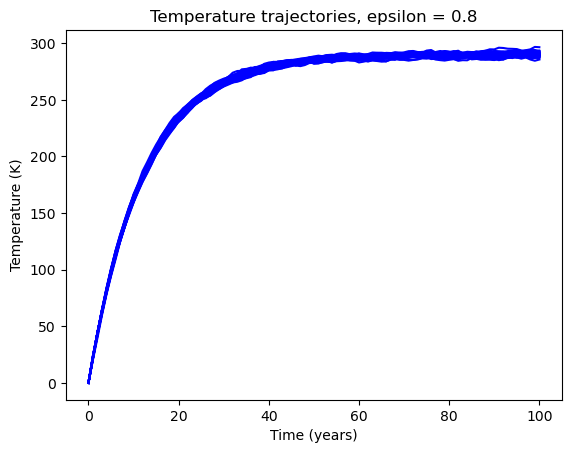

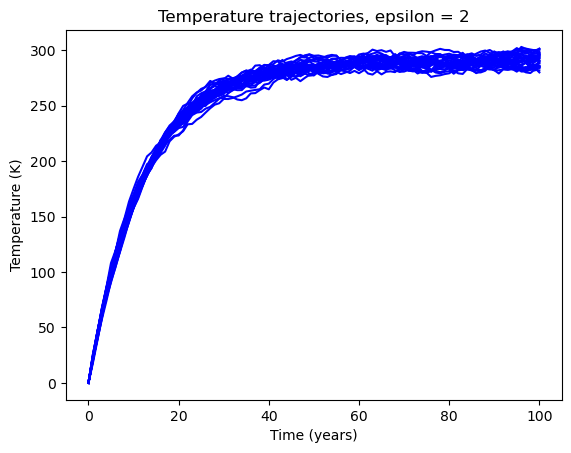

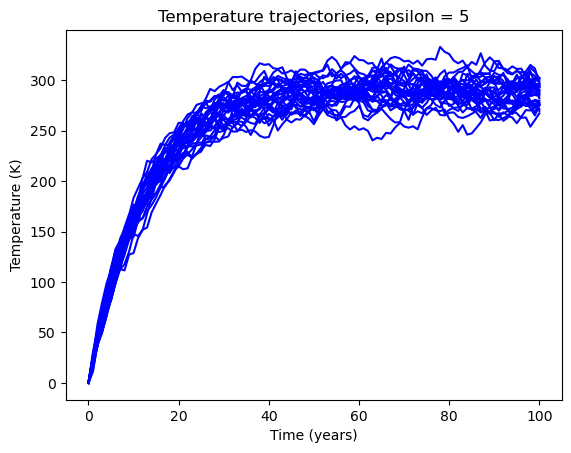

In [8]:
#constant for noise amplitude. 0.059 was in the slides, but I updated it to give larger amplitudes
epsilons = [0.059,0.6, 0.8,2,5]
epsilon = 0.059
total_time = 100 #years
#create discretisation points
time = np.linspace(0,total_time,total_time+1)
#create empty numpy array initialized with zeroes
T=np.zeros((total_time+1,))

def generate_random():
    noise = np.random.randn()
    return noise

for j in range(len(epsilons)):
    plt.figure()
    for k in range(0,30):
        #Use the derived equation from the text above to solve the integral and plot, choose timestep of one
        for i in range(total_time):
            noise = generate_random()
            #print(epsilon*noise)
            T[i+1] = T[i]-(T[i]-eq_temp)/tau_zero + epsilons[j]*noise
    
        plt.plot(time,T,'b')
    plt.title(f'Temperature trajectories, epsilon = {epsilons[j]}')
    plt.xlabel('Time (years)')
    plt.ylabel('Temperature (K)')
    plt.show()

3) repeat 2) for a few different cases changing the equilibrium temperature and/or the relaxation time
scale, by tuning the appropriate parameters.

    - Change values of tau zero and eq_temp. Code below.

In [20]:
T=np.zeros((total_time+1,))
eq_temps = [250,350,0,500,120]
taus = [5,12.69,15,30,55]

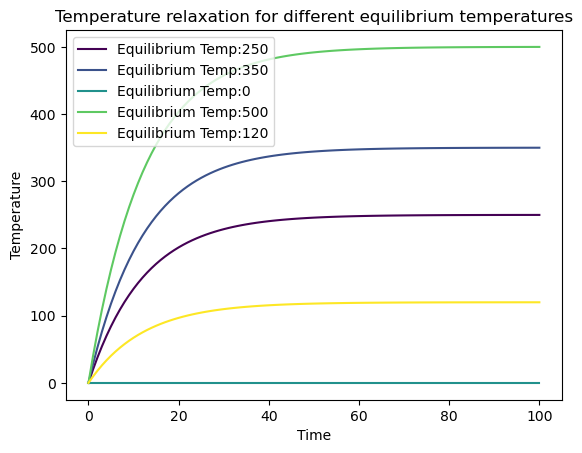

In [18]:
plt.figure()
colors = plt.cm.viridis(np.linspace(0, 1, len(eq_temps)))
for k in range(len(eq_temps)):
    for i in range(total_time):
        #print('T[i+1]:',T[i+1],'T[i]:',T[i],'eq_temps[k]:',eq_temps[k])
        T[i+1] = T[i]-(T[i]-eq_temps[k])/tau_zero*1
    plt.plot(time, T, color=colors[k], label=f"Equilibrium Temp:{eq_temps[k]}")
    k+=1
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Temperature relaxation for different equilibrium temperatures")
plt.legend()
plt.show()

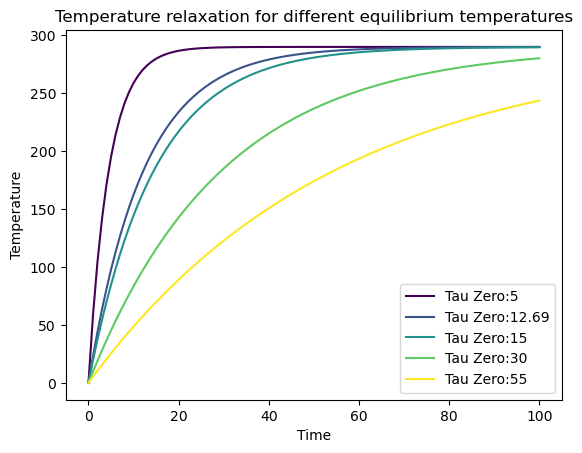

In [21]:
plt.figure()
colors = plt.cm.viridis(np.linspace(0, 1, len(taus)))
for k in range(len(taus)):
    for i in range(total_time):
        #print('T[i+1]:',T[i+1],'T[i]:',T[i],'eq_temps[k]:',eq_temps[k])
        T[i+1] = T[i]-(T[i]-eq_temp)/taus[k]*1
    plt.plot(time, T, color=colors[k], label=f"Tau Zero:{taus[k]}")
    k+=1
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Temperature relaxation for different equilibrium temperatures")
plt.legend()
plt.show()

4) compute and plot the potential of the model for a few different cases

   a) The potential function is defined as the potential energy in the given equation. So if dT/dt = N(T), the potential is     defined as dV/dt = -N(T), the potential of the force, N(T), acting on T.

   b) Find the potential by integrating: V(T) = -integral (-infinity,T) N(T')dT'

   c) Similar to above, need to discretize the function. Rather than continuous integration, choose a maximum and minimum
    value and compute discrete steps, delta(T):
   
       - V(T) = -sum(Tmin,Tmax) N(T)delta(T)

In [22]:
#max, min, and number of points
x=np.linspace(200,400,1000)
#discretisation
dx=x[1]-x[0]

#V(T) = -sum(Tmin,Tmax) N(T)delta(T)
V=-np.cumsum(-(x-eq_temp)/tau_zero_seconds)*dx

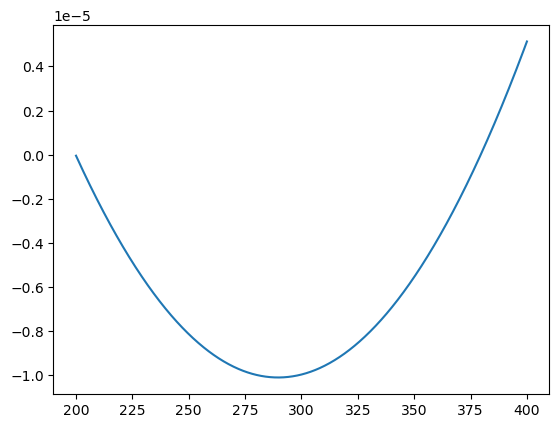

In [23]:
plt.figure()
plt.plot(x,V)

The potential shows a stable fixed-point equilibrium at ~285

Exercise 2

Consider the Budyko Sellers model:

C(dT/dt) = S0/4(1-ap(T))-A-BT
where αp is a function of T as seen, and (with S2=-0.477).

1) for different values of S0, show graphically the existence (or not) of multiple solutions, by looking for zeros of the right hand side of the equation. Choose cases that give different behaviours (you can see the values of S0 to take form the hysteresis plot).
2) write a code to integrate numerically the equation. Plot time series of the solution starting from different initial conditions for the cases you have shown in 1);
3) compute the potential for the cases considered in 1) and 2). How can you compute the numerical value of the equilibrium solution(s) without running the simulations?

1) for different values of S0, show graphically the existence (or not) of multiple solutions, by looking for zeros of the right hand side of the equation. Choose cases that give different behaviours (you can see the values of S0 to take form the hysteresis plot).

   a) This function is slightly different than the one in Exercise 1 because albedo now depends on temperature, which is       more realistic. I use the equations given in the slides to find the ice line based on temperature as in the code below

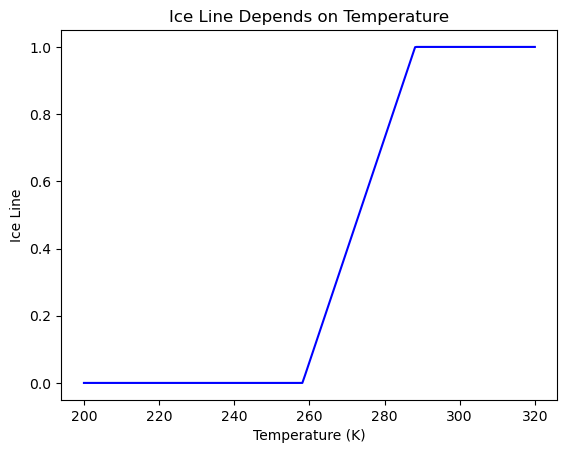

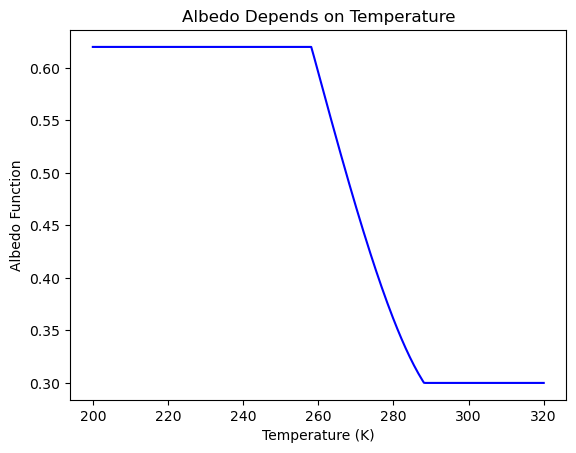

In [29]:
#define s_two as given in slides
S_two = -0.477
#define boundaries for ice line as given in slides (converted to Kelvin)
t_two = 288.15
t_one = 258.15
total_temp = 320 
#create discretisation points
temps = np.linspace(200,total_temp,total_temp+1)
#create array to store ice lines
x_ices=np.zeros((total_temp+1,))
x_ices[0]=0
#define aplus and aminus
a_plus = 0.62
a_minus = 0.3
#create empty numpy array initialized with zeroes
p_a=np.zeros((total_temp+1,))
#choose intial temp far enough away from equilibrium to see the change
p_a[0]=0
#define ice line based on temperature
for temp in range(total_temp+1):
    #print(temps[temp])
    if temps[temp]<=t_one:
        x_ice = 0
    elif temps[temp]>=t_two:
        x_ice = 1
    elif temps[temp]>t_one and temps[temp]<t_two:
        x_ice = (temps[temp]-t_one)/(t_two-t_one)
    x_ices[temp]=x_ice
    #albedo function equation
    p_a[temp] = a_plus - (a_plus - a_minus)*(x_ice + S_two/2*(x_ice**3-x_ice))
    
plt.plot(temps,x_ices,'b')
plt.title('Ice Line Depends on Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('Ice Line')
plt.show()

plt.plot(temps,p_a,'b')
plt.title('Albedo Depends on Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('Albedo Function')
plt.show()

1) for different values of S0, show graphically the existence (or not) of multiple solutions, by looking for zeros of the right hand side of the equation. Choose cases that give different behaviours (you can see the values of S0 to take form the hysteresis plot)

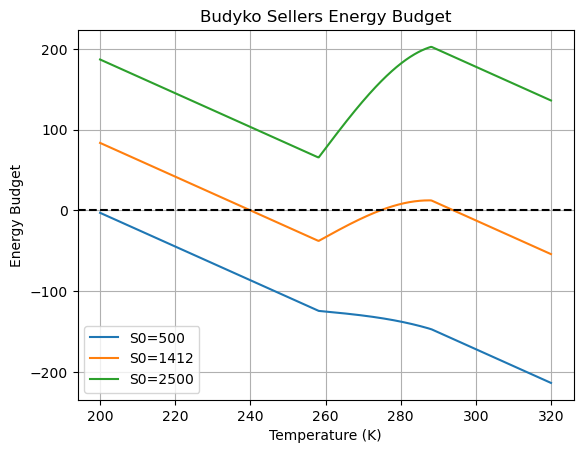

In [43]:
#define ice line based on temperature
def get_albedo(temp):
    #print(temps[temp])
    if temp<=t_one:
        x_ice = 0
    elif temp>=t_two:
        x_ice = 1
    elif temp>t_one and temp<t_two:
        x_ice = (temp-t_one)/(t_two-t_one)
        
    #albedo function equation
    p_a = a_plus - (a_plus - a_minus)*(x_ice + (S_two/2)*(x_ice**3-x_ice))

    return p_a
    

#S0 values to test
S0_values = [500,1412,2500]
total_T = 500
albedos=np.zeros(total_T,)
T = np.linspace(200, 320, 500)
energy_budget = np.zeros((total_T,))
for S0 in range(len(S0_values)):
    for temp in range(total_T):
        albedo=get_albedo(T[temp])
        albedos[temp]=albedo
        energy_budget[temp] = S0_values[S0]/4 * (1 - albedo)-A-B*T[temp]
    plt.plot(T, energy_budget, label=f"S0={S0_values[S0]}")
    #plt.plot(albedos, energy_budget, label=f"S0={S0_values[S0]}")

plt.axhline(0, color='k', linestyle='--')
plt.xlabel('Temperature (K)')
plt.ylabel('Energy Budget')
plt.title('Budyko Sellers Energy Budget')
plt.legend()
plt.grid(True)
plt.show()


Graph shows solutions of energy budget at different solar constant starting points. With a value of 1412, the equation shows three fixed-point equilibria, one stable and two unstable.

The other two lines show states of a hot Earth and 'snowball' Earth, each with no equilibrium state.

2) write a code to integrate numerically the equation. Plot time series of the solution starting from
different initial conditions for the cases you have shown in 1);

    a) As before, put the change in temperature over time on one side of the equation:
       dT/dt = 1/C((S0/4)*(1-a(T))-A-BT)
    b) Replace time derivative with forward difference equation:
       (T(n+1)-Tn)/delta(T) = 1/C((S0/4)*(1-a(T))-A-BT)
    c) Solve for T(n+1):
       T(n+1) = Tn + delta(T)/C((S0/4)*(1-a(T))-A-BT)

   In this case, since albedo is a function of temperature, we need to keep albedo as a parameter in the equation.

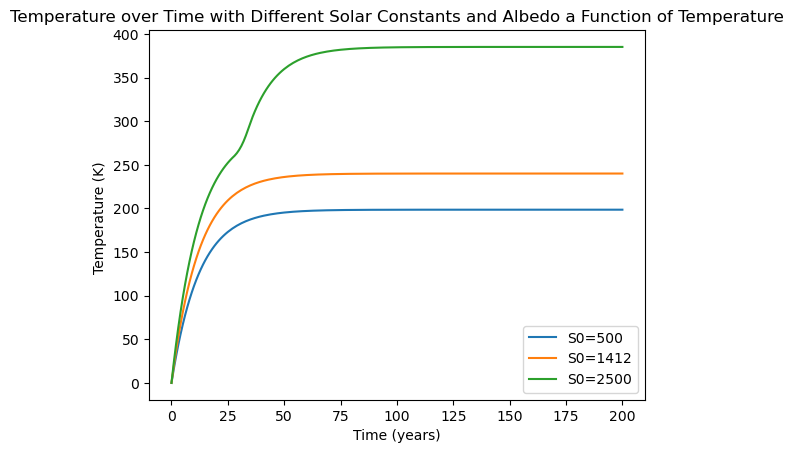

In [44]:
#conversion for timestep
seconds_per_year = 365*86400
total_time = 200
time = np.linspace(0,total_time,total_time+1)
T=np.zeros(total_time+1,)
plt.figure()
for S0 in range(len(S0_values)):
    for i in range(total_time):
        albedo=get_albedo(T[i])
        s_zero = S0_values[S0]/4
        T[i+1] = T[i]+1*seconds_per_year/C*(s_zero*(1-albedo)-A-B*T[i])
        #print(T[i])
    plt.plot(time, T, label=f"S0={S0_values[S0]}")
plt.xlabel("Time (years)")
plt.ylabel("Temperature (K) ")
plt.title("Temperature over Time with Different Solar Constants and Albedo a Function of Temperature")
plt.legend()
plt.show()

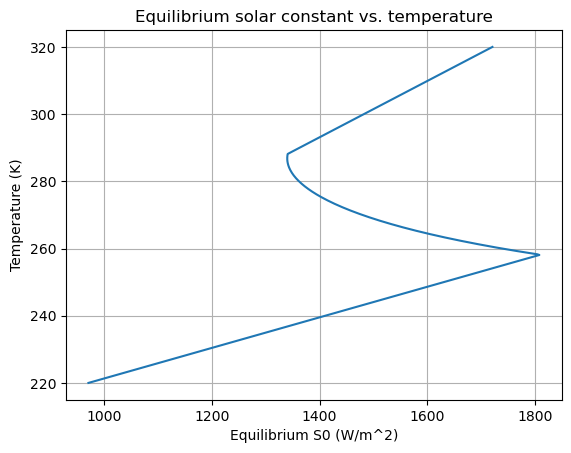

In [67]:
T = np.linspace(220, 320, 500)
total_temps = 500
S0_eq=np.zeros(total_temps,)
for temp in range(total_temps):
    albedo=get_albedo(T[temp])
    #print(B)
    S0_eq[temp] = 4*(A + B*T[temp])/(1 - albedo)

plt.plot(S0_eq,T)
plt.ylabel("Temperature (K)")
plt.xlabel("Equilibrium S0 (W/m^2)")
plt.title("Equilibrium solar constant vs. temperature")
plt.grid(True)
plt.show()

3) compute the potential for the cases considered in 1) and 2).

   a) V(T) = -sum(Tmin,Tmax) N(T)delta(T)
       - V(T) = -sum(Tmin,Tmax((S0/4)*(1-a(T))-A-BT)/C)(dt)

In [82]:
#max, min, and number of points
x=np.linspace(0,400,2000)
#discretisation
dx=x[1]-x[0]
f_T=np.zeros(len(x),)
#get F(T)
for i in range(len(x)):
    #print(i)
    f_T[i] = (S0/4*(1 - get_albedo(x[i]))-A-B*x[i])/C
    
#V(T) = -sum(Tmin,Tmax) N(T)delta(T)
V=-np.cumsum(f_T)*dx

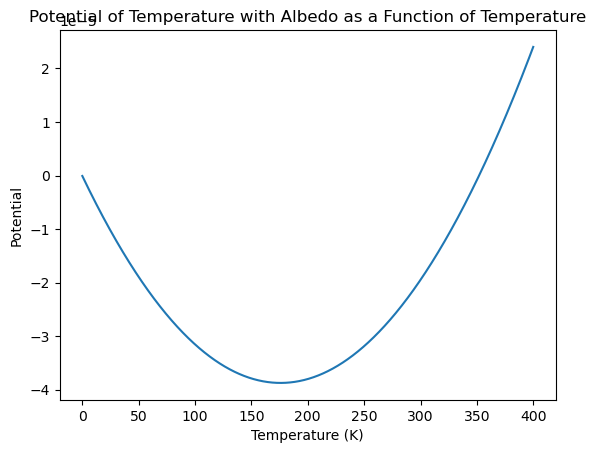

In [83]:
plt.figure()
plt.title("Potential of Temperature with Albedo as a Function of Temperature")
plt.xlabel('Temperature (K)')
plt.ylabel('Potential')
plt.plot(x,V)
plt.show()

The potential function shows a maxima at 200, which is an unstable fixed point equilibrium.